# Agenda
* Numpy
* Pandas
* And SUPER quick so you can play

# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [4]:
%matplotlib inline

import numpy as np
import os

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [6]:
# Creating arrays
a = np.zeros(3)
b = np.ones((2,3))
c = np.random.randint(1,10,[2,3,4])
d = np.arange(0,11,1)
e = np.zeros_like(b)

What are these functions?

    arange?
    zeros_like?

In [7]:
# Note the way each array is printed:
array_data = [a, b, c, d, e]
array_name = ['a', 'b', 'c', 'd', 'e']

for arr in zip(array_data, array_name):
    print('\n{}\n{}'.format(arr[1], arr[0]))


a
[ 0.  0.  0.]

b
[[ 1.  1.  1.]
 [ 1.  1.  1.]]

c
[[[1 7 1 9]
  [1 4 1 2]
  [2 3 4 9]]

 [[3 3 3 5]
  [1 9 5 3]
  [9 8 4 4]]]

d
[ 0  1  2  3  4  5  6  7  8  9 10]

e
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [17]:
## Arithmetic in arrays is element wise

In [8]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [9]:
c = a-b
c

array([20, 29, 38, 47])

In [12]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [13]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [22]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [23]:
a[2:5]

array([ 4,  9, 16])

In [24]:
# Multidimensional arrays use square brackets []  with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [15]:
b = np.random.randint(1,100,[4,4])
b

array([[23, 28, 38, 42],
       [75, 74, 62, 96],
       [85, 54,  1, 16],
       [95, 54,  9, 80]])

In [21]:
# Guess the output
print(b[2,3])
print(b[0,0])

16
23


In [22]:
b

array([[23, 28, 38, 42],
       [75, 74, 62, 96],
       [85, 54,  1, 16],
       [95, 54,  9, 80]])

In [23]:
b[0,:]

array([23, 28, 38, 42])

In [24]:
b[1:3,:]

array([[75, 74, 62, 96],
       [85, 54,  1, 16]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
dates = pd.date_range('20140101',periods = 6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [27]:
df = pd.DataFrame(np.random.randn(6,4),index = dates, columns = ['A','B','C','D'])

In [28]:
# Index, columns, underlying numpy data
df

,A,B,C,D
2014-01-01,-0.817283,-0.418365,0.014888,-1.561872
2014-01-02,0.727926,-1.145034,-1.023579,-0.052420
2014-01-03,-0.897618,0.221578,-0.343496,-1.466176
2014-01-04,0.755831,-0.221405,1.402572,0.493049
2014-01-05,-2.123076,-1.331059,-0.535347,1.034847
2014-01-06,-0.863258,-0.667358,0.237292,2.358118


In [32]:
df['A']

2014-01-01   -0.817283
2014-01-02    0.727926
2014-01-03   -0.897618
2014-01-04    0.755831
2014-01-05   -2.123076
2014-01-06   -0.863258
Freq: D, Name: A, dtype: float64

In [34]:
#Access the index using df.index (can be sliced like an array...because it is.)
df.index[3:5]

DatetimeIndex(['2014-01-04', '2014-01-05'], dtype='datetime64[ns]', freq='D')

In [35]:
#To get your columns take a guess...
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [36]:
#Make the columns quicker to work with (change to lower case)
df.columns = [column.lower() for column in df.columns]
df.columns

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [37]:
#Change the columns back to upper to not break the code below...
df.columns = [column.upper() for column in df.columns]
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [39]:
df.T

,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00
A,-0.817283,0.727926,-0.897618,0.755831,-2.123076,-0.863258
B,-0.418365,-1.145034,0.221578,-0.221405,-1.331059,-0.667358
C,0.014888,-1.023579,-0.343496,1.402572,-0.535347,0.237292
D,-1.561872,-0.052420,-1.466176,0.493049,1.034847,2.358118


In [40]:
df2 = pd.DataFrame({ 'constant1s' : 1.,
                         'date' : pd.Timestamp('20130102'),
                         'constant3s' : np.array([3] * 4,dtype='int32'),
                         'foo' : 'foo', 
                         'rands' : np.random.randint(-100, 100, 4),
                         'name': ['rex', 'hex','nex','tex']
                   }, 
                   index = ['Obs1', 'Obs2', 'Obs3', 'Obs4'])

df2

,constant1s,constant3s,date,foo,name,rands
Obs1,1.0,3,2013-01-02,foo,rex,-28
Obs2,1.0,3,2013-01-02,foo,hex,-46
Obs3,1.0,3,2013-01-02,foo,nex,96
Obs4,1.0,3,2013-01-02,foo,tex,50


In [41]:
# With specific dtypes
df2.dtypes

constant1s           float64
constant3s             int32
date          datetime64[ns]
foo                   object
name                  object
rands                  int64
dtype: object

#### Viewing Data

In [42]:
df2.head(2)

,constant1s,constant3s,date,foo,name,rands
Obs1,1.0,3,2013-01-02,foo,rex,-28
Obs2,1.0,3,2013-01-02,foo,hex,-46


In [44]:
df2.tail(3)

,constant1s,constant3s,date,foo,name,rands
Obs2,1.0,3,2013-01-02,foo,hex,-46
Obs3,1.0,3,2013-01-02,foo,nex,96
Obs4,1.0,3,2013-01-02,foo,tex,50


In [52]:
df2.index

Index([u'Obs1', u'Obs2', u'Obs3', u'Obs4'], dtype='object')

In [45]:
df2.describe()

,constant1s,constant3s,rands
count,4.0,4.0,4.000000
mean,1.0,3.0,18.000000
std,0.0,0.0,66.633325
min,1.0,3.0,-46.000000
25%,1.0,3.0,-32.500000
50%,1.0,3.0,11.000000
75%,1.0,3.0,61.500000
max,1.0,3.0,96.000000


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Obs1 to Obs4
Data columns (total 6 columns):
constant1s    4 non-null float64
constant3s    4 non-null int32
date          4 non-null datetime64[ns]
foo           4 non-null object
name          4 non-null object
rands         4 non-null int64
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 208.0+ bytes


In [48]:
df2.sort_values(by = 'rands', inplace = True, ascending = False)
df2

,constant1s,constant3s,date,foo,name,rands
Obs3,1.0,3,2013-01-02,foo,nex,96
Obs4,1.0,3,2013-01-02,foo,tex,50
Obs1,1.0,3,2013-01-02,foo,rex,-28
Obs2,1.0,3,2013-01-02,foo,hex,-46


### Selection

In [26]:
print(type(df2['date']))
print(type(df2[['date']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [49]:
df2[0:3]

,constant1s,constant3s,date,foo,name,rands
Obs3,1.0,3,2013-01-02,foo,nex,96
Obs4,1.0,3,2013-01-02,foo,tex,50
Obs1,1.0,3,2013-01-02,foo,rex,-28


In [51]:
# By index label
df2.loc[['Obs1', 'Obs2']]

,constant1s,constant3s,date,foo,name,rands
Obs1,1.0,3,2013-01-02,foo,rex,-28
Obs2,1.0,3,2013-01-02,foo,hex,-46


In [53]:
# By row number
df2.iloc[3]

constant1s                      1
constant3s                      3
date          2013-01-02 00:00:00
foo                           foo
name                          hex
rands                         -46
Name: Obs2, dtype: object

# DON'T USE IX!

* Depreciated

In [55]:
# multi-axis by label
df2.iloc[1:3][['date', 'name']]

,date,name
Obs4,2013-01-02,tex
Obs1,2013-01-02,rex


### Filtering

,A,B,C,D
2014-01-01,1.526642,-1.056367,0.261044,-0.072560
2014-01-02,-0.322615,0.162695,0.753664,-0.590634
2014-01-03,-0.215158,0.392882,-0.858539,-1.952988
2014-01-04,0.768338,-2.215082,0.829841,1.772364
2014-01-05,-1.024821,-0.901176,-1.342059,-0.075436
2014-01-06,0.943796,1.757387,0.266227,-1.136569


In [56]:
#And
df[(df['A'] > 0) & (df['B'] < 1.0)]

,A,B,C,D
2014-01-02,0.727926,-1.145034,-1.023579,-0.052420
2014-01-04,0.755831,-0.221405,1.402572,0.493049


In [61]:
df2

,constant1s,constant3s,date,foo,name,rands
Obs1,1.0,3,2013-01-02,foo,rex,-6
Obs2,1.0,3,2013-01-02,foo,hex,79
Obs3,1.0,3,2013-01-02,foo,nex,-36
Obs4,1.0,3,2013-01-02,foo,tex,10


In [65]:
#Or

df2[(df2['name'] == 'hex') | (df2['name'] == 'tex')]

,constant1s,constant3s,date,foo,name,rands
Obs2,1.0,3,2013-01-02,foo,hex,79
Obs4,1.0,3,2013-01-02,foo,tex,10


In [74]:
#Not

df2[df2['name'] != 'nex']

,constant1s,constant3s,date,foo,name,rands
Obs1,1.0,3,2013-01-02,foo,rex,-6
Obs2,1.0,3,2013-01-02,foo,hex,79
Obs4,1.0,3,2013-01-02,foo,tex,10


In [72]:
df2['name'] != 'nex'

Obs1     True
Obs2     True
Obs3    False
Obs4     True
Name: name, dtype: bool

### Setting

In [30]:
df

,A,B,C,D
2014-01-01,1.526642,-1.056367,0.261044,-0.072560
2014-01-02,-0.322615,0.162695,0.753664,-0.590634
2014-01-03,-0.215158,0.392882,-0.858539,-1.952988
2014-01-04,0.768338,-2.215082,0.829841,1.772364
2014-01-05,-1.024821,-0.901176,-1.342059,-0.075436
2014-01-06,0.943796,1.757387,0.266227,-1.136569


In [31]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA['A'] < 0] = -1 * df_posA

df_posA

,A,B,C,D
2014-01-01,1.526642,-1.056367,0.261044,-0.072560
2014-01-02,0.322615,-0.162695,-0.753664,0.590634
2014-01-03,0.215158,-0.392882,0.858539,1.952988
2014-01-04,0.768338,-2.215082,0.829841,1.772364
2014-01-05,1.024821,0.901176,1.342059,0.075436
2014-01-06,0.943796,1.757387,0.266227,-1.136569


In [79]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],
               index = pd.date_range('20140102', periods = 6))

In [80]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [81]:
df['F'] = s1

In [75]:
df

,A,B,C,D
2014-01-01,1.526642,-1.056367,0.261044,-0.072560
2014-01-02,-0.322615,0.162695,0.753664,-0.590634
2014-01-03,-0.215158,0.392882,-0.858539,-1.952988
2014-01-04,0.768338,-2.215082,0.829841,1.772364
2014-01-05,-1.024821,-0.901176,-1.342059,-0.075436
2014-01-06,0.943796,1.757387,0.266227,-1.136569


### Missing Data

In [58]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [59]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [60]:
df1

,A,B,C,D,E
2014-01-01,-0.817283,-0.418365,0.014888,-1.561872,1.0
2014-01-02,0.727926,-1.145034,-1.023579,-0.052420,1.0
2014-01-03,-0.897618,0.221578,-0.343496,-1.466176,NaN
2014-01-04,0.755831,-0.221405,1.402572,0.493049,NaN


In [61]:
# find where values are null in a single column
df1['E'].isnull()

2014-01-01    False
2014-01-02    False
2014-01-03     True
2014-01-04     True
Freq: D, Name: E, dtype: bool

In [62]:
#Or the entire dataframe 

df1.isnull()

,A,B,C,D,E
2014-01-01,False,False,False,False,False
2014-01-02,False,False,False,False,False
2014-01-03,False,False,False,False,True
2014-01-04,False,False,False,False,True


In [83]:
#How many?
df1.isnull().sum()

A    0
B    0
C    0
D    0
E    2
dtype: int64

In [63]:
#Alternatively
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2014-01-01 to 2014-01-04
Freq: D
Data columns (total 5 columns):
A    4 non-null float64
B    4 non-null float64
C    4 non-null float64
D    4 non-null float64
E    2 non-null float64
dtypes: float64(5)
memory usage: 352.0 bytes


### Operations

In [33]:
df.sum()

A    1.676182
B   -1.859662
C   -0.089822
D   -2.055824
dtype: float64

In [87]:
df.abs()

,A,B,C,D
2014-01-01,1.526642,1.056367,0.261044,0.072560
2014-01-02,0.322615,0.162695,0.753664,0.590634
2014-01-03,0.215158,0.392882,0.858539,1.952988
2014-01-04,0.768338,2.215082,0.829841,1.772364
2014-01-05,1.024821,0.901176,1.342059,0.075436
2014-01-06,0.943796,1.757387,0.266227,1.136569


In [88]:
#Combining both numpy AND pandas
np.sqrt(df**2)

,A,B,C,D
2014-01-01,1.526642,1.056367,0.261044,0.072560
2014-01-02,0.322615,0.162695,0.753664,0.590634
2014-01-03,0.215158,0.392882,0.858539,1.952988
2014-01-04,0.768338,2.215082,0.829841,1.772364
2014-01-05,1.024821,0.901176,1.342059,0.075436
2014-01-06,0.943796,1.757387,0.266227,1.136569


In [55]:
df.std(),df.std(1) # Operation on two different axes

(A    1.005776
 B    0.990474
 C    1.652812
 D    1.080384
 F    1.581139
 dtype: float64, 2014-01-01    0.915831
 2014-01-02    0.864860
 2014-01-03    1.387454
 2014-01-04    1.711775
 2014-01-05    2.147586
 2014-01-06    2.781207
 Freq: D, dtype: float64)

### Applying functions

In [56]:
df

,A,B,C,D,F
2014-01-01,-0.048496,-1.273812,0.925128,0.210164,NaN
2014-01-02,0.980316,-0.544368,1.852774,0.906805,1.0
2014-01-03,0.368769,1.388155,2.457488,-1.008777,2.0
2014-01-04,-0.212609,0.187066,0.371853,-1.737735,3.0
2014-01-05,-1.497165,-0.865812,0.129452,0.966884,4.0
2014-01-06,1.348693,-1.012099,-2.274584,0.187387,5.0


In [57]:
df.apply(np.cumsum)

,A,B,C,D,F
2014-01-01,-0.048496,-1.273812,0.925128,0.210164,NaN
2014-01-02,0.931820,-1.818180,2.777903,1.116969,1.0
2014-01-03,1.300588,-0.430025,5.235390,0.108192,3.0
2014-01-04,1.087979,-0.242960,5.607243,-1.629543,6.0
2014-01-05,-0.409186,-1.108771,5.736696,-0.662659,10.0
2014-01-06,0.939507,-2.120870,3.462112,-0.475271,15.0


In [64]:
df['A'].str.lower()

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [97]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Concatination

In [98]:
np.random.randn(10,4)

array([[-0.23087368,  0.30634153,  1.3390809 ,  0.20126746],
       [-1.20466804,  0.37818392,  0.78502404,  0.72480311],
       [ 0.48651259,  0.15649685,  0.74349144, -1.00546315],
       [-1.31404969,  1.05792108, -0.84519592,  0.61755247],
       [ 0.3049107 , -0.74761535,  1.14187834,  1.22756517],
       [-1.74211033,  0.19406159, -0.00325876,  1.45541327],
       [-0.21687543, -0.29607426, -0.20719582,  0.15226072],
       [ 0.94240337,  1.48971852,  1.81607351,  1.38876318],
       [ 1.21140686, -0.4422771 , -1.81969077, -0.27841073],
       [ 0.05861619, -0.68984229, -0.97168473,  1.1845709 ]])

In [99]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-1.849619,0.164610,0.116809,1.120152
1,0.934852,0.619090,-0.408814,-0.967300
2,-1.912836,0.136191,-1.018770,-1.054325
3,-0.521659,1.869238,0.833172,-1.328757
4,-1.135315,3.011221,-0.193525,-0.153465
5,0.330113,-1.372947,-1.022102,1.935032
6,-0.450908,-0.384946,-0.143508,-0.919469
7,1.807882,0.401354,-0.731408,-0.002333
8,-1.106339,0.890917,0.892086,1.250441
9,-0.539113,1.342341,-0.881583,-2.546182


In [100]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -1.849619  0.164610  0.116809  1.120152
 1  0.934852  0.619090 -0.408814 -0.967300
 2 -1.912836  0.136191 -1.018770 -1.054325,
           0         1         2         3
 3 -0.521659  1.869238  0.833172 -1.328757
 4 -1.135315  3.011221 -0.193525 -0.153465
 5  0.330113 -1.372947 -1.022102  1.935032
 6 -0.450908 -0.384946 -0.143508 -0.919469,
           0         1         2         3
 7  1.807882  0.401354 -0.731408 -0.002333
 8 -1.106339  0.890917  0.892086  1.250441
 9 -0.539113  1.342341 -0.881583 -2.546182]

In [101]:
pd.concat(pieces[0:3])

,0,1,2,3
0,-1.849619,0.164610,0.116809,1.120152
1,0.934852,0.619090,-0.408814,-0.967300
2,-1.912836,0.136191,-1.018770,-1.054325
3,-0.521659,1.869238,0.833172,-1.328757
4,-1.135315,3.011221,-0.193525,-0.153465
5,0.330113,-1.372947,-1.022102,1.935032
6,-0.450908,-0.384946,-0.143508,-0.919469
7,1.807882,0.401354,-0.731408,-0.002333
8,-1.106339,0.890917,0.892086,1.250441
9,-0.539113,1.342341,-0.881583,-2.546182


In [102]:
pd.concat([pieces[0], pieces[2]])

,0,1,2,3
0,-1.849619,0.164610,0.116809,1.120152
1,0.934852,0.619090,-0.408814,-0.967300
2,-1.912836,0.136191,-1.018770,-1.054325
7,1.807882,0.401354,-0.731408,-0.002333
8,-1.106339,0.890917,0.892086,1.250441
9,-0.539113,1.342341,-0.881583,-2.546182


### Merging

Merging is similar to database methods (eg. SQL).

inner - keep rows that match

outer - keep all

left - Keep all rows from the left dataframe, add matching right rows and replace those missing with nan

right - As above, just with the right dataframe

<img src = "https://static1.squarespace.com/static/54bb1957e4b04c160a32f928/t/5724fd0bf699bb5ad6432150/1462041871236/">

In [103]:
df1 = pd.DataFrame({'id': [1, 2, 3, 4, 5],
                   'device': ['d1', 'd2', 'd3', 'd4', 'd5'],
                   'connect': [1, 0, 1, 1, 0]
                   })

df2 = pd.DataFrame({'id': [2, 5],
                   'suffix': ['c', 'd'],
                   'got_monkeys': [0, 1]
                   })


pd.merge(df1, df2, how = 'left', on = 'id')

,connect,device,id,got_monkeys,suffix
0,1,d1,1,NaN,NaN
1,0,d2,2,0.0,c
2,1,d3,3,NaN,NaN
3,1,d4,4,NaN,NaN
4,0,d5,5,1.0,d


### Grouping


In [104]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [105]:
df

,A,B,C,D
0,foo,one,0.184917,-0.108043
1,bar,one,0.435301,-0.524566
2,foo,two,-0.143474,0.991786
3,bar,three,-1.786502,0.028355
4,foo,two,0.165898,-1.334645
5,bar,two,0.449375,-1.940525
6,foo,one,0.674095,0.510977
7,foo,three,-0.590683,-1.119788


In [106]:
#Group by single variable
df.groupby(['A']).mean()

,C,D
A,,
bar,-0.300609,-0.812245
foo,0.058151,-0.211943


In [83]:
#Group by multiple variables
df.groupby(['A', 'B']).mean()

C         D
A   B                        
bar one    0.018039 -1.005966
    three  0.520017  0.496287
    two   -0.208478 -0.638873
foo one    1.453730  0.489401
    three -0.036985 -0.711176
    two    0.370171  0.315668

### Reshaping

In [ ]:
# You can also stack or unstack levels

In [91]:
a = df.groupby(['A','B']).mean()
a

C         D
A   B                        
bar one    0.018039 -1.005966
    three  0.520017  0.496287
    two   -0.208478 -0.638873
foo one    1.453730  0.489401
    three -0.036985 -0.711176
    two    0.370171  0.315668

In [86]:
df

,A,B,C,D
0,foo,one,0.323602,-0.757419
1,bar,one,0.018039,-1.005966
2,foo,two,0.446945,-0.183376
3,bar,three,0.520017,0.496287
4,foo,two,0.293398,0.814712
5,bar,two,-0.208478,-0.638873
6,foo,one,2.583857,1.736220
7,foo,three,-0.036985,-0.711176


In [97]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'], aggfunc = 'mean')

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar  0.018039  0.520017 -0.208478 -1.005966  0.496287 -0.638873
foo  1.453730 -0.036985  0.370171  0.489401 -0.711176  0.315668

### Time Series


In [68]:
import pandas as pd
import numpy as np

In [69]:
# 60 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods = 60, freq = 'S')
rng

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 00:00:01',
               '2014-01-01 00:00:02', '2014-01-01 00:00:03',
               '2014-01-01 00:00:04', '2014-01-01 00:00:05',
               '2014-01-01 00:00:06', '2014-01-01 00:00:07',
               '2014-01-01 00:00:08', '2014-01-01 00:00:09',
               '2014-01-01 00:00:10', '2014-01-01 00:00:11',
               '2014-01-01 00:00:12', '2014-01-01 00:00:13',
               '2014-01-01 00:00:14', '2014-01-01 00:00:15',
               '2014-01-01 00:00:16', '2014-01-01 00:00:17',
               '2014-01-01 00:00:18', '2014-01-01 00:00:19',
               '2014-01-01 00:00:20', '2014-01-01 00:00:21',
               '2014-01-01 00:00:22', '2014-01-01 00:00:23',
               '2014-01-01 00:00:24', '2014-01-01 00:00:25',
               '2014-01-01 00:00:26', '2014-01-01 00:00:27',
               '2014-01-01 00:00:28', '2014-01-01 00:00:29',
               '2014-01-01 00:00:30', '2014-01-01 00:00:31',
               '2014-01-

In [70]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [71]:
ts

2014-01-01 00:00:00    195
2014-01-01 00:00:01    264
2014-01-01 00:00:02    340
2014-01-01 00:00:03     48
2014-01-01 00:00:04     95
2014-01-01 00:00:05    215
2014-01-01 00:00:06    172
2014-01-01 00:00:07    240
2014-01-01 00:00:08    416
2014-01-01 00:00:09    138
2014-01-01 00:00:10    276
2014-01-01 00:00:11    372
2014-01-01 00:00:12    150
2014-01-01 00:00:13    471
2014-01-01 00:00:14    107
2014-01-01 00:00:15    134
2014-01-01 00:00:16    448
2014-01-01 00:00:17    284
2014-01-01 00:00:18    144
2014-01-01 00:00:19    101
2014-01-01 00:00:20    464
2014-01-01 00:00:21    271
2014-01-01 00:00:22    247
2014-01-01 00:00:23    288
2014-01-01 00:00:24    106
2014-01-01 00:00:25     63
2014-01-01 00:00:26    351
2014-01-01 00:00:27    269
2014-01-01 00:00:28    425
2014-01-01 00:00:29     62
2014-01-01 00:00:30    229
2014-01-01 00:00:31    110
2014-01-01 00:00:32    427
2014-01-01 00:00:33    373
2014-01-01 00:00:34    275
2014-01-01 00:00:35    110
2014-01-01 00:00:36    453
2

In [72]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01    248.683333
Freq: T, dtype: float64

### Plotting


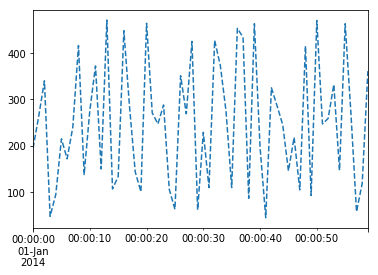

In [75]:
ts.plot(linestyle = '--')

In [101]:
def randwalk(startdate, points):
    ts = pd.Series(np.random.randn(points), index = pd.date_range(startdate, periods = points))
    ts = ts.cumsum()
    ts.plot()
    return(ts)

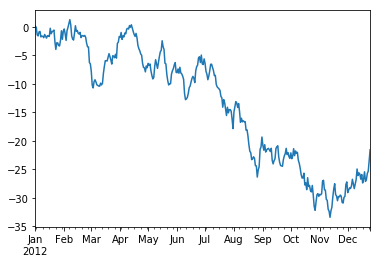

In [102]:
# Using pandas to make a simple random walker by repeatedly running:
a = randwalk('1/1/2012', 360)

In [103]:
# Pandas plot function will print with labels as default

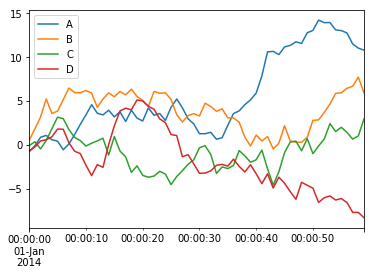

In [104]:
df = pd.DataFrame(np.random.randn(60, 4), index = ts.index,columns=['A', 'B', 'C', 'D'])
df2 = df.apply(np.cumsum)
plt.figure()
df2.plot()
plt.legend(loc='best')

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

In [ ]:
df = pd.read_csv('path/to/file.csv')

In [105]:
# Remember - pandas can also read data from a URL that links directly with a file
df = pd.read_csv('https://raw.githubusercontent.com/petergoodin/general_stuff/master/ozone.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [108]:
df.to_csv(os.path.join(os.getcwd(), 'example_output.csv'), index = False)

In [109]:
pd.read_csv(os.path.join(os.getcwd(), 'example_output.csv')).head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


# Next Steps

Your turn to get familair with pandas!
Open the jupyter notebook located at:

./lesson-02/starter-code/starter-code-2.ipynb

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas